# Model Formation

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

import pickle

In [2]:
df = pd.read_csv("data.csv")

In [3]:
display(df)

,date,opponent,div_rank,gb,attendance,cLI,winning_percentage,year,total_games_played,weekday,month,night_game,pop_opp
0,"Monday, Apr 11",MIN,4,-2.5,57806,0.78,0.167,1994,5,1,Apr,1,0
1,"Tuesday, Apr 12",MIN,4,-2.0,13489,0.86,0.286,1994,6,1,Apr,1,0
2,"Wednesday, Apr 13",MIN,4,-3.0,16207,0.91,0.250,1994,7,1,Apr,0,0
3,"Friday, Apr 15",MIL,4,-2.0,16969,0.86,0.333,1994,8,0,Apr,1,0
4,"Saturday, Apr 16",MIL,4,-2.5,32990,0.92,0.300,1994,9,0,Apr,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,"Saturday, Jul 24",OAK,3,-7.0,30843,1.21,0.535,2021,98,0,Jul,1,0
2118,"Sunday, Jul 25",OAK,3,-7.0,21501,1.32,0.540,2021,99,0,Jul,0,0
2119,"Monday, Jul 26",HOU,3,-6.0,15162,1.41,0.545,2021,100,1,Jul,1,0
2120,"Tuesday, Jul 27",HOU,3,-7.0,18930,1.51,0.539,2021,101,1,Jul,1,0


### Transforming String Attributes

In [4]:
df = df.drop(['date'], axis=1)
le = LabelEncoder()

df['opponent'] = le.fit_transform(df.opponent)
df['month'] = le.fit_transform(df.month)

display(df)

,opponent,div_rank,gb,attendance,cLI,winning_percentage,year,total_games_played,weekday,month,night_game,pop_opp
0,19,4,-2.5,57806,0.78,0.167,1994,5,1,0,1,0
1,19,4,-2.0,13489,0.86,0.286,1994,6,1,0,1,0
2,19,4,-3.0,16207,0.91,0.250,1994,7,1,0,0,0
3,18,4,-2.0,16969,0.86,0.333,1994,8,0,0,1,0
4,18,4,-2.5,32990,0.92,0.300,1994,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2117,23,3,-7.0,30843,1.21,0.535,2021,98,0,2,1,0
2118,23,3,-7.0,21501,1.32,0.540,2021,99,0,2,0,0
2119,13,3,-6.0,15162,1.41,0.545,2021,100,1,2,1,0
2120,13,3,-7.0,18930,1.51,0.539,2021,101,1,2,1,0


### Checking for NULL Values

In [5]:
df = df.dropna()
print(df.shape)
print(df.isnull().sum())

(2121, 12)
opponent              0
div_rank              0
gb                    0
attendance            0
cLI                   0
winning_percentage    0
year                  0
total_games_played    0
weekday               0
month                 0
night_game            0
pop_opp               0
dtype: int64


### Generating New HeatMap

<AxesSubplot:>

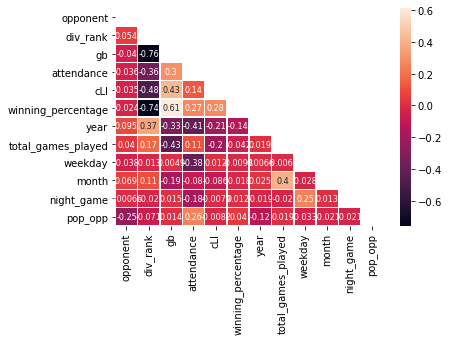

In [6]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, linewidth=0.5, mask=mask, annot_kws={"size": 8})

### Generating X_train and y_train

In [7]:
X = df.drop(["attendance"], axis=1)
y = df["attendance"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 86)

## Generating Evaluation and Feature Importance Functions

In [9]:

def evaluate(model):    
    
    # fitting data and getting r2 score    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = r2_score(y_test, pred) 
    print("R^2 score:", score)
    
    # generating scatter plot for residuals
    df = pd.DataFrame(columns=['attendance', 'predictions', 'residuals'])
    df.attendance = y
    df.predictions = model.predict(X)
    df.residuals = df.attendance - df.predictions
    df.plot(x='predictions', y='residuals', kind='scatter')
    plt.show()

In [10]:

def feat_imp(model):
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']
                                      ).sort_values('importance', ascending=False)
    print (feature_importances)

## Generating Random Forest Regessor

In [11]:
rf = RandomForestRegressor(n_estimators=200)

R^2 score: 0.7207537771759558


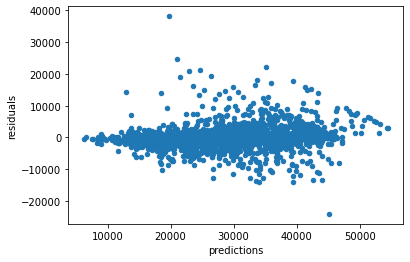

In [12]:
evaluate(rf)

In [13]:
feat_imp(rf)

                    importance
year                  0.378251
weekday               0.144103
winning_percentage    0.125350
total_games_played    0.121156
cLI                   0.047270
pop_opp               0.039777
month                 0.039556
gb                    0.038000
opponent              0.036000
night_game            0.020716
div_rank              0.009820


In [14]:
gbr = GradientBoostingRegressor(n_estimators =200)

R^2 score: 0.7445696770645112


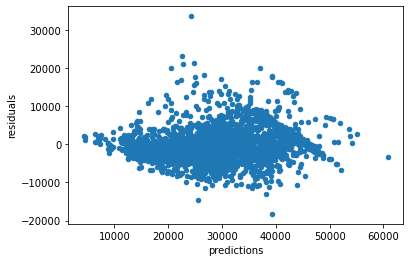

In [15]:
evaluate(gbr)

In [16]:
feat_imp(gbr)

                    importance
year                  0.437688
weekday               0.178474
total_games_played    0.109869
winning_percentage    0.104597
pop_opp               0.049116
month                 0.036330
cLI                   0.026489
gb                    0.019523
opponent              0.019500
night_game            0.014917
div_rank              0.003497


### feature importance analysis
- The year attribute seems to be heavily important in both relatively successful models created. This as a mariners fan I can fully undertand as there are seamingly great years and bad years, in which attendance stays relatively the same throughout the year.
- The divison rank attribute has absolutly no importance towards our model, which is suprising partly because the descrete differences the box plot from the EDA protioned showed in population, as well as the fact that when the mariners are in 1st place I would predict a heavy attendance. 

### Dropping attributes with least importance for conveniance of app deployment

In [17]:
X = df.drop(["attendance", "cLI", "month", "gb", "opponent", "night_game", "div_rank"], axis=1)
y = df["attendance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 54)

R^2 score: 0.7231610907113732


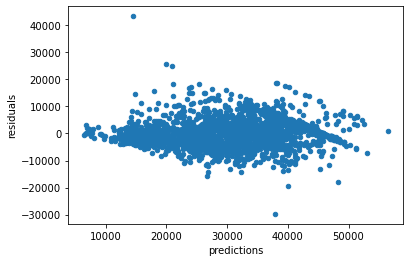

In [18]:
model_dep = GradientBoostingRegressor(n_estimators =200)
model_dep.fit(X_train,y_train)
evaluate(model_dep)

### Notes
Removing Less important features drops our r2 score only by roughly 0.2 - 0.3, which shouldn't effect our deployed model too greatly.

## Dummy Prediction and checking for order of attributes

In [19]:
print(model_dep.predict([['.700', '2020', '60','1','1']]))
print(X_train.first)

[24204.59131471]
<bound method NDFrame.first of       winning_percentage  year  total_games_played  weekday  pop_opp
390                0.525  1999                  58        0        1
1921               0.571  2018                  41        1        0
496                0.579  2000                 106        1        1
1481               0.481  2012                 132        0        0
645                0.631  2002                  83        1        0
...                  ...   ...                 ...      ...      ...
1033               0.510  2007                  50        0        0
2065               0.420  2019                 161        0        0
1927               0.608  2018                  50        0        0
1047               0.560  2007                  74        1        1
898                0.437  2005                 102        0        0

[1484 rows x 5 columns]>


In [20]:
pickle.dump(model_dep, open('model.p','wb'))
model = pickle.load(open('model.p','rb'))